## Ngô Hồng Thông 22649011

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image_paths = ['./building.jpg', './cameraman.png', './lena.jpg', './low-exposure.jpg']

#### Robert Cross

Processing: ./building.jpg


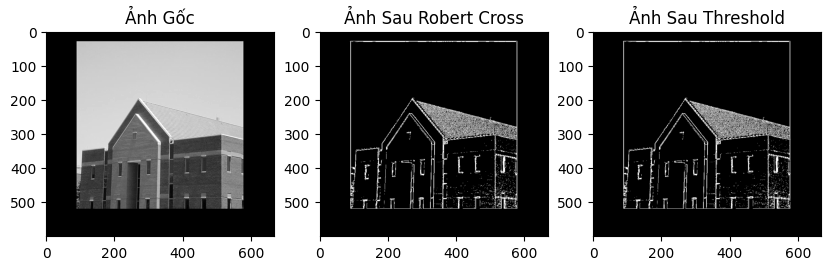

Processing: ./cameraman.png


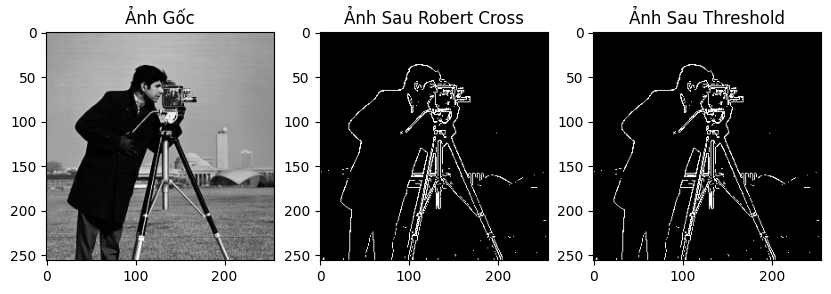

Processing: ./lena.jpg


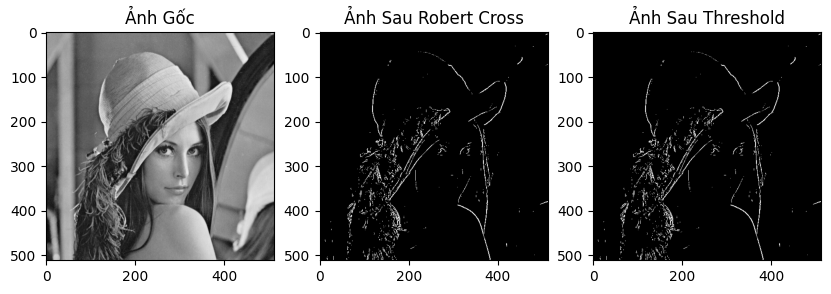

Processing: ./low-exposure.jpg


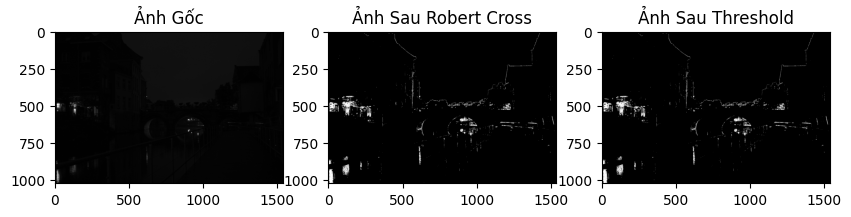

In [6]:
kernel_x = np.array([[0, 0, 0], [0, -1, 0], [0, 0, 1]], dtype=np.float32)
kernel_y = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]], dtype=np.float32)

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)
    
    img_gradient = np.abs(grad_x) + np.abs(grad_y)

    threshold = np.mean(img_gradient) * 5
    img_gradient[img_gradient < threshold] = 0
    img_gradient[img_gradient != 0] = 255
    img_threshold = img_gradient.astype(np.uint8)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Ảnh Gốc')

    plt.subplot(1, 3, 2)
    plt.imshow(img_gradient, cmap='gray')
    plt.title('Ảnh Sau Robert Cross')

    plt.subplot(1, 3, 3)
    plt.imshow(img_threshold, cmap='gray')
    plt.title('Ảnh Sau Threshold')

    plt.show()

for image_path in image_paths:
    print(f"Processing: {image_path}")
    process_image(image_path)

#### Prewitt filter

Processing: ./building.jpg


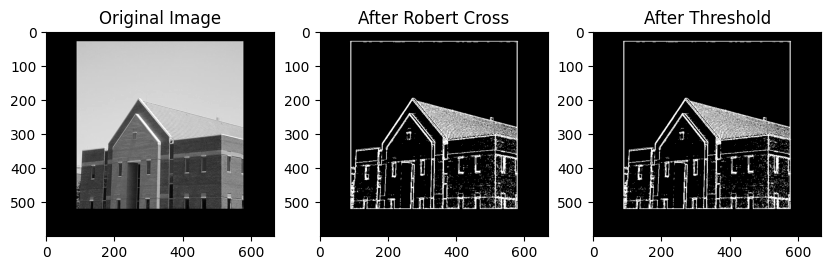

Processing: ./cameraman.png


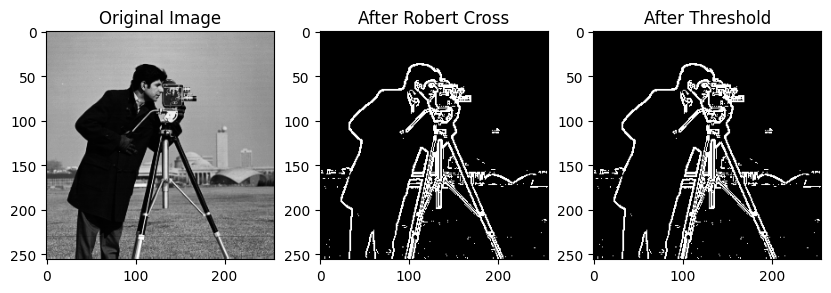

Processing: ./lena.jpg


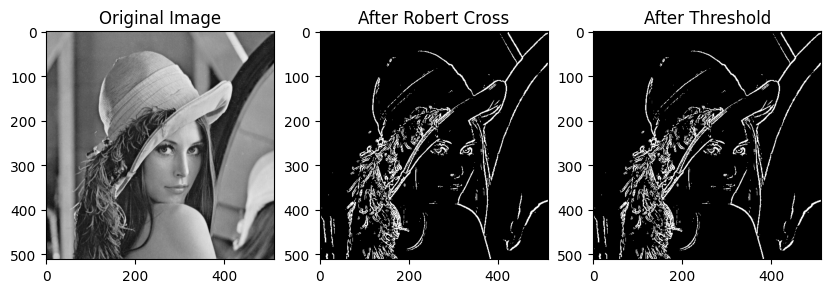

Processing: ./low-exposure.jpg


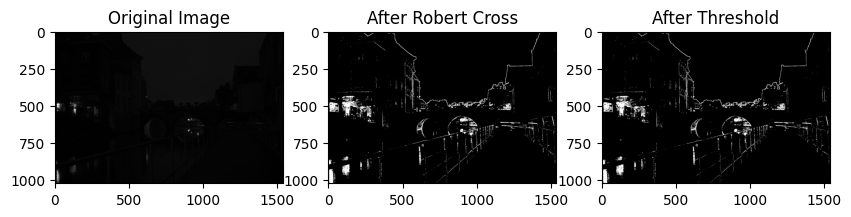

In [7]:
kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float32)
kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=np.float32)

# Function to process and display an image
def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply the Robert Cross operator
    grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)
    
    img_gradient = np.abs(grad_x) + np.abs(grad_y)

    # Apply thresholding
    threshold = np.mean(img_gradient) * 3
    img_gradient[img_gradient < threshold] = 0
    img_gradient[img_gradient >= threshold] = 255
    img_threshold = img_gradient.astype(np.uint8)

    # Display the results
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(img_gradient, cmap='gray')
    plt.title('After Robert Cross')

    plt.subplot(1, 3, 3)
    plt.imshow(img_threshold, cmap='gray')
    plt.title('After Threshold')

    plt.show()

for image_path in image_paths:
    print(f"Processing: {image_path}")
    process_image(image_path)

#### Sobel Filter

Processing: ./building.jpg


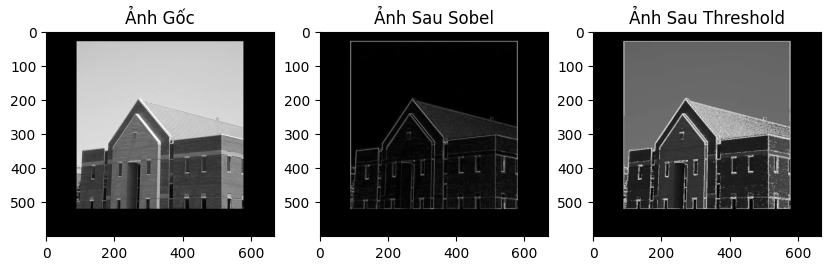

Processing: ./cameraman.png


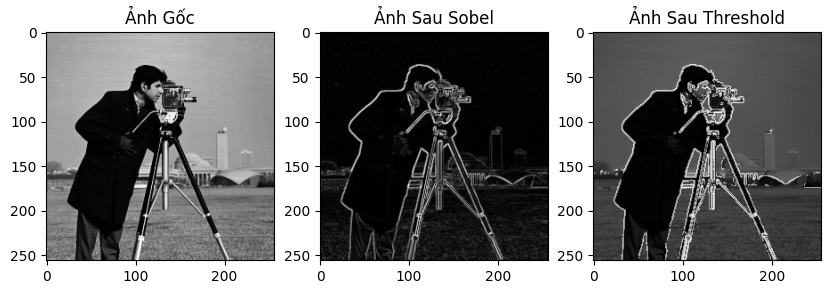

Processing: ./lena.jpg


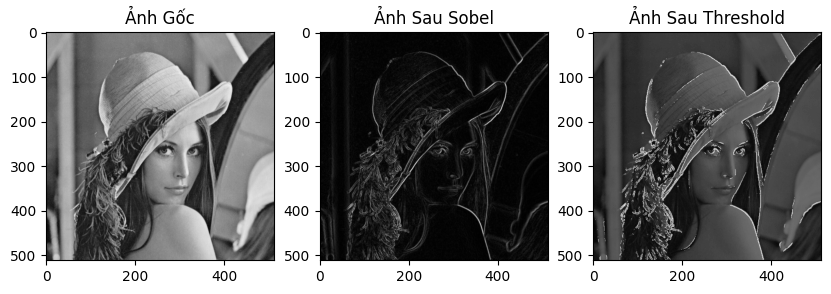

Processing: ./low-exposure.jpg


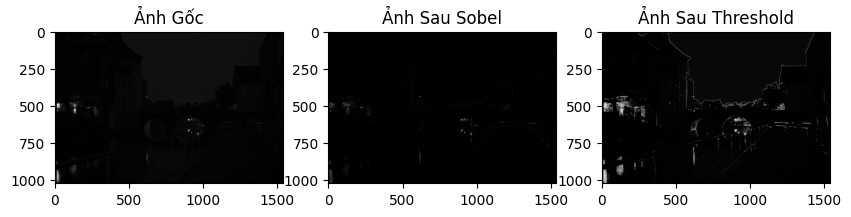

In [8]:
def detect_edges_sobel_and_thresh(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

    grad_x = cv2.filter2D(img, cv2.CV_64F, kernel_x)
    grad_y = cv2.filter2D(img, cv2.CV_64F, kernel_y)

    img_gradient = np.abs(grad_x) + np.abs(grad_y)

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Ảnh Gốc')

    plt.subplot(1, 3, 2)
    plt.imshow(img_gradient, cmap='gray')
    plt.title('Ảnh Sau Sobel')

    threshold = np.mean(img_gradient) * 4
    img_gradient[img_gradient < threshold] = 0
    img_gradient[img_gradient != 0] = 255
    img_threshold = img_gradient.astype(np.uint8)
    img_threshold = cv2.addWeighted(img_threshold, 0.5, img, 0.5, 0)
    plt.subplot(1, 3, 3)
    plt.imshow(img_threshold, cmap='gray')
    plt.title('Ảnh Sau Threshold')

    plt.show()

for image_path in image_paths:
    print(f"Processing: {image_path}")
    detect_edges_sobel_and_thresh(image_path)
